In [1]:
#setup wrapper functions
from setup import setup_datasets
from tau_calculations import make_taus
from tau_calculations import count_gene_categories
from tau_calculations import make_unified_gene_list,unify_tau_dataframes
from intersect_genes import scatterplot_tau, cutoff_heatmap
from intersect_genes import get_specific_tau, get_final_list

In [2]:
brain_cell_type = 'neurons'
organ_type = 'Liver'
all_data = setup_datasets(brain_cell_type, organ_type)

Importing protein annotations/ID conversions...


100%|██████████████| 203711/203711 [00:03<00:00, 60290.34it/s]
/Users/siddharthiyer/Dropbox (MIT)/DAT/Computational/Surface_Markers/bin/import_surfacemarker_data.py:22: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  annotations = pd.read_csv('../data/prot_ann/uniprotkb_homo_sapiens_AND_model_organi_2023_12_06.tsv',  sep='\t')


Done!
Importing mass spectrometry data...
Done!


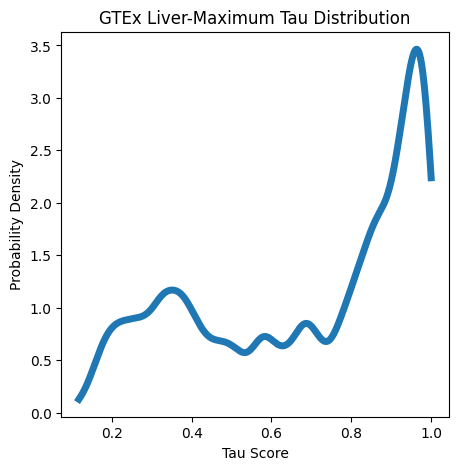

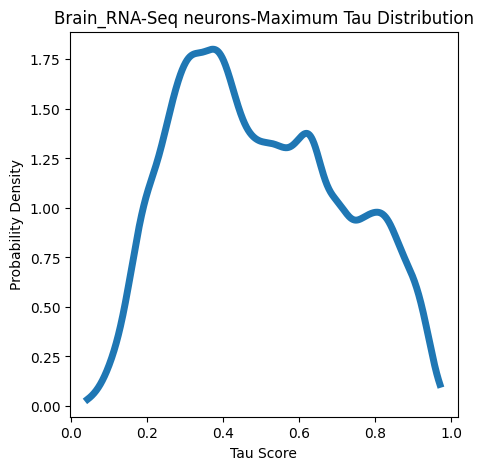

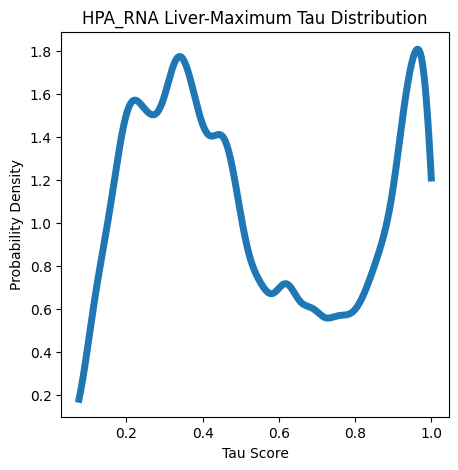

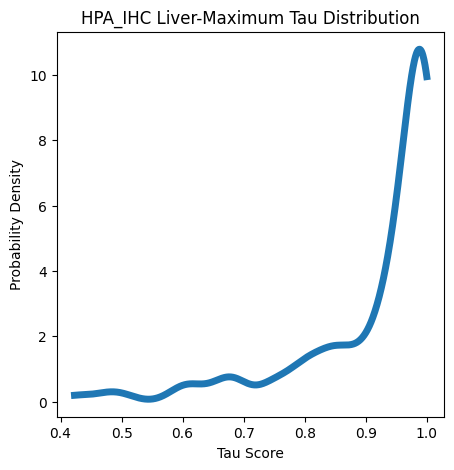

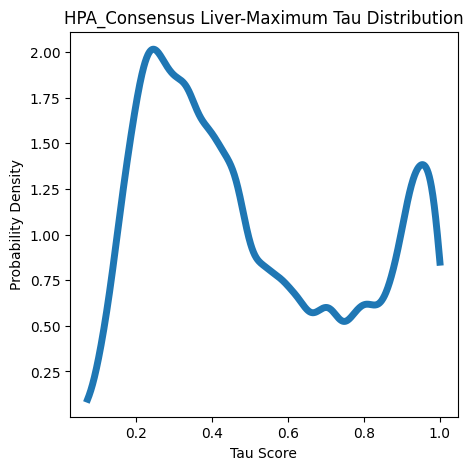

In [3]:
all_data = make_taus(all_data)

Creating unified gene lists...
Done!


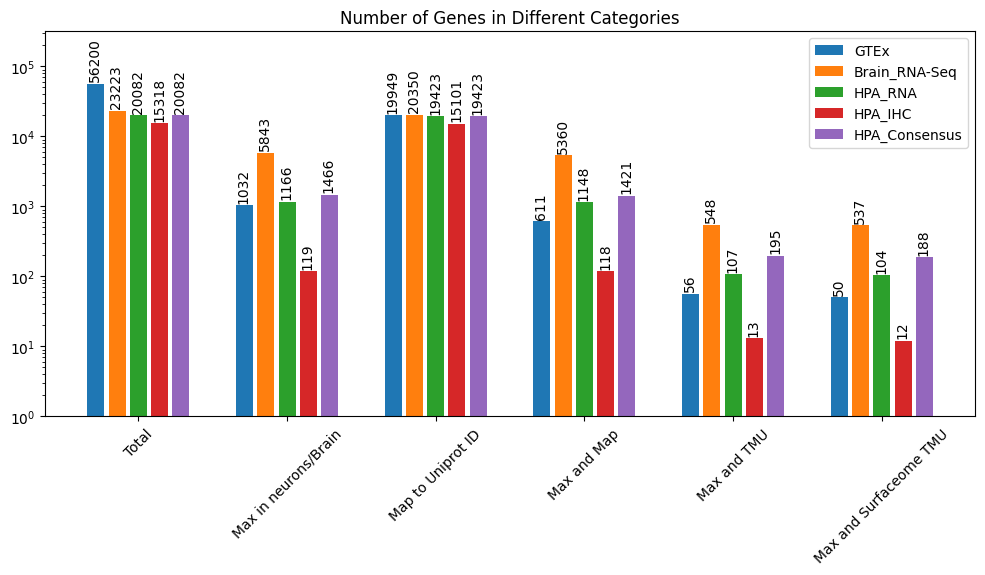

In [4]:
count_gene_categories(all_data)
all_data = make_unified_gene_list(all_data)

,GTEx,HPA_RNA,HPA_IHC,HPA_Consensus,DT Mass Spec - Plasma,DT Mass Spec - CSF,DT Mass Spec - Neuron Culture,HPPP - Plasma,HPPP - CSF,iPSC Proteomics,Guldbrandsen2014,Zhang2007,Macron2018,Schutzer2010,Begcevic2016,Thompson2020,Muraoka2020,Thompson2018,Chiasserini2014,Sum in Mass Spec
HSD17B7,0.297750,0.464304,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
SLCO1B3,0.986972,0.966369,1.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
SLC22A10,0.980263,0.995408,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
ABCG8,0.976722,0.929130,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
ABCG5,0.971327,0.941913,0.000000,0.781913,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
SLC2A2,0.965974,0.937416,0.967840,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
PAQR9,0.963312,0.911385,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
SLC30A10,0.958454,0.894407,0.945854,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
CLDN14,0.935786,0.950360,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
TMPRSS6,0.931676,0.923804,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


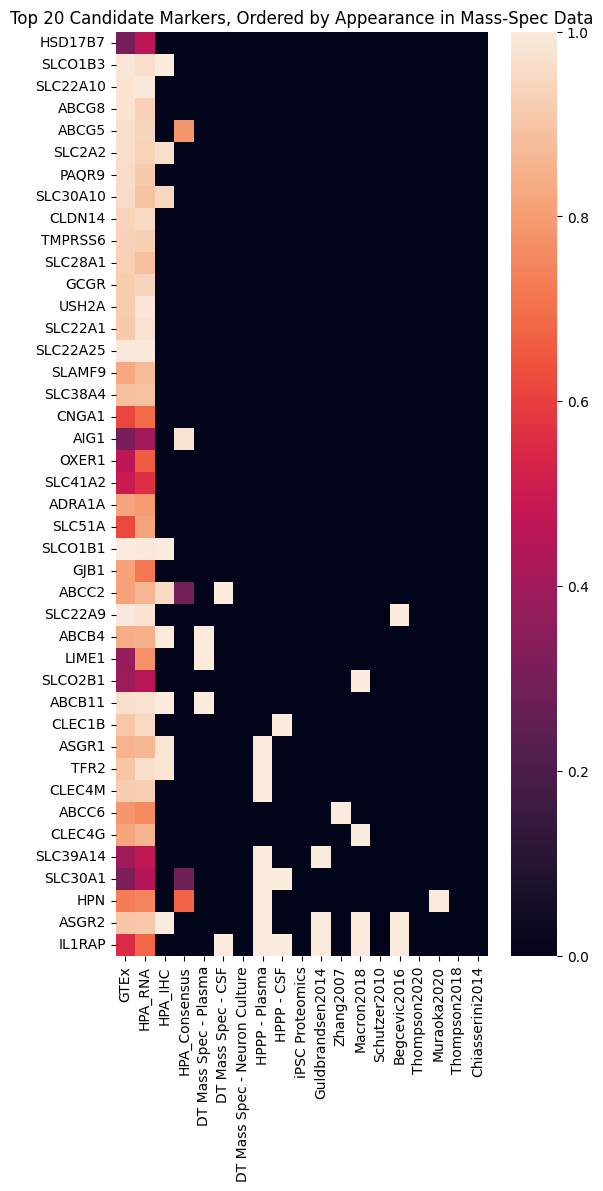

In [5]:
from surface_marker_utils import intersection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

lst1= intersection(list(all_data['max_tau_dfs'][0].Gene), list(all_data['max_tau_dfs'][2].Gene))
lst2 = intersection(lst1, list(all_data['max_tau_dfs'][3].Gene))
lst3 =  intersection(lst2, list(all_data['max_tau_dfs'][4].Gene))
lst4 = intersection(lst1, all_data['TMU'])

g2ts = []
names= []
for i, df in enumerate(all_data['max_tau_dfs']):
    if all_data['gene_exp_df_names'][i] != 'Brain_RNA-Seq':
        g2t = {g:t for g,t in zip(df.Gene, df.Tau)}
        g2ts.append(g2t)
        names.append(all_data['gene_exp_df_names'][i])

specific_tau = pd.DataFrame()
lst5 = []
for i in np.argsort([g2ts[0][u] for u in lst4]):
    if lst4[i] in all_data['u2g']:
        lst5.append(lst4[i])
specific_tau.index = [all_data['u2g'][u] for u in lst5]

taus = np.zeros((len(lst5), 4))
for j, (name, g2t) in enumerate(zip(names, g2ts)):
    for i, u in enumerate(lst5):
        if u in g2t:
            taus[i,j] = g2t[u]
        else:
            taus[i,j] = 0
    specific_tau[name] = taus[:,j]
    
for name, data in zip(all_data['mass_spec_names'], all_data['mass_spec']):
    specific_tau[name] = [int(uniprot in data) for uniprot in lst5]
    
specific_tau['Sum in Mass Spec'] = np.sum(specific_tau.values[:,-len(all_data['mass_spec_names']):],
                                                    axis = 1);
specific_tau = specific_tau.sort_values('Sum in Mass Spec')

topk = 100
plt.figure(figsize = (6,12));
sns.heatmap(specific_tau.iloc[-topk:,:-1]);
plt.title('Top 20 Candidate Markers, Ordered by Appearance in Mass-Spec Data');

all_data['specific_tau'] = specific_tau.copy()


specific_tau

In [32]:
pseudo_liver = pd.read_csv('../data/sc_liver/bulk_Liver.csv')

import matplotlib.pyplot as plt
def plot_clusters(df, gene_name):
    row = list(df['Gene Name']).index(gene_name)
    h = df.iloc[row].values[1:]
    plt.bar(x = np.arange(h.size), height = h)
    
def plot_markers(df, gene_names):
    mat = np.zeros((len(gene_names), df.shape[1]-1))
    
    for i, gene_name in enumerate(gene_names):
        row = list(df['Gene Name']).index(gene_name)
        mat[i,:] = df.iloc[row].values[1:]
    sns.heatmap(mat,yticklabels = gene_names)

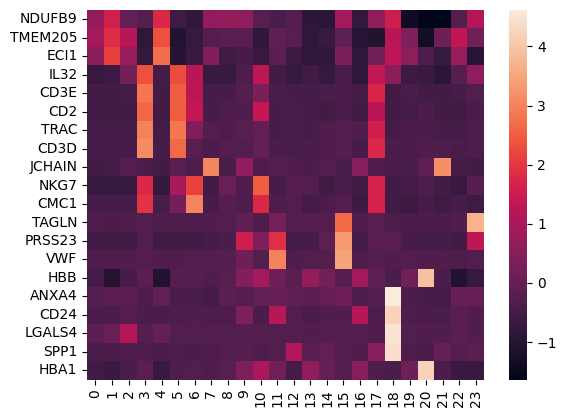

In [34]:
plot_markers(pseudo_liver,
             ['NDUFB9',
              'TMEM205',
              'ECI1',
              'IL32',
              'CD3E',
              'CD2',
              'TRAC',
              'CD3D',
              'JCHAIN',
              'NKG7',
              'CMC1',
              
              'TAGLN',
              'PRSS23',
              'VWF',
              'HBB',
              'ANXA4',
              'CD24',
              'LGALS4',
              'SPP1',
              'HBA1',
             ]
            )

In [ ]:
0: 'Hepatocytes',
1:'Hepatocytes',
2:'Hepatocytes',
3:,
4:'Hepatocytes',
5:'NK Cells,
6:,
7: 'Plasma Cells',
8:,
9:,
10:'T-Cells_gd',
11:,
12:,
13:,
14:,
16:,
16:,
17:'Hepatocytes',
18:,
19:'Hepatocytes',
20:,
21:'Plasma Cells',
22:'Hepatocytes',
23:,